It is an unsupervised machine learning algo

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
%matplotlib inline

In [173]:
digits=load_digits()
X=digits.data
y=digits.target

In [174]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

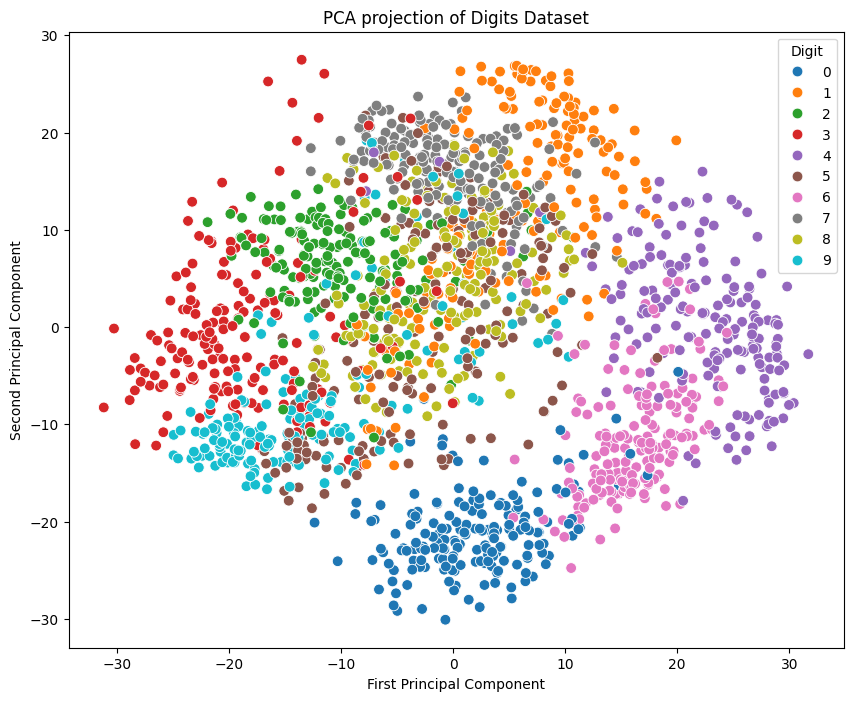

In [175]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", s=60)
plt.title("PCA projection of Digits Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title='Digit')
plt.show()

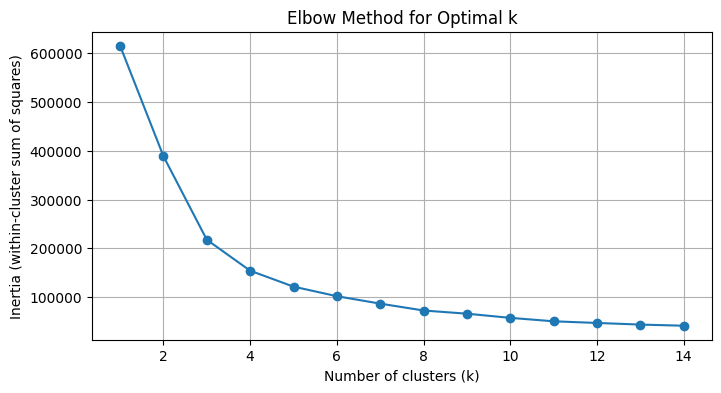

In [176]:
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Should not look for elbow point on PCA reduced data as original data and dimensions are reduced

In [177]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

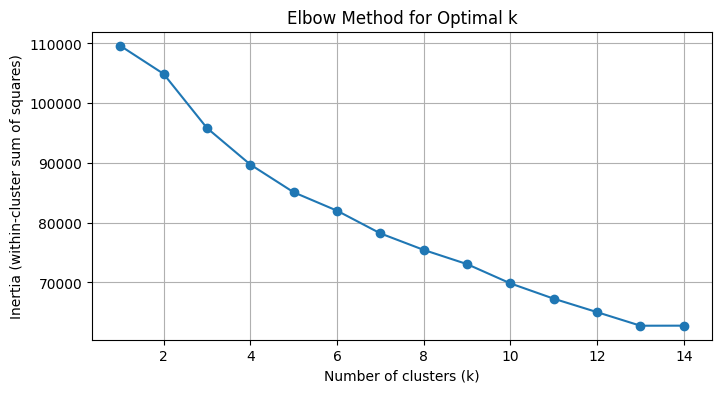

In [178]:
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [179]:
kmeans = KMeans(n_clusters=1, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

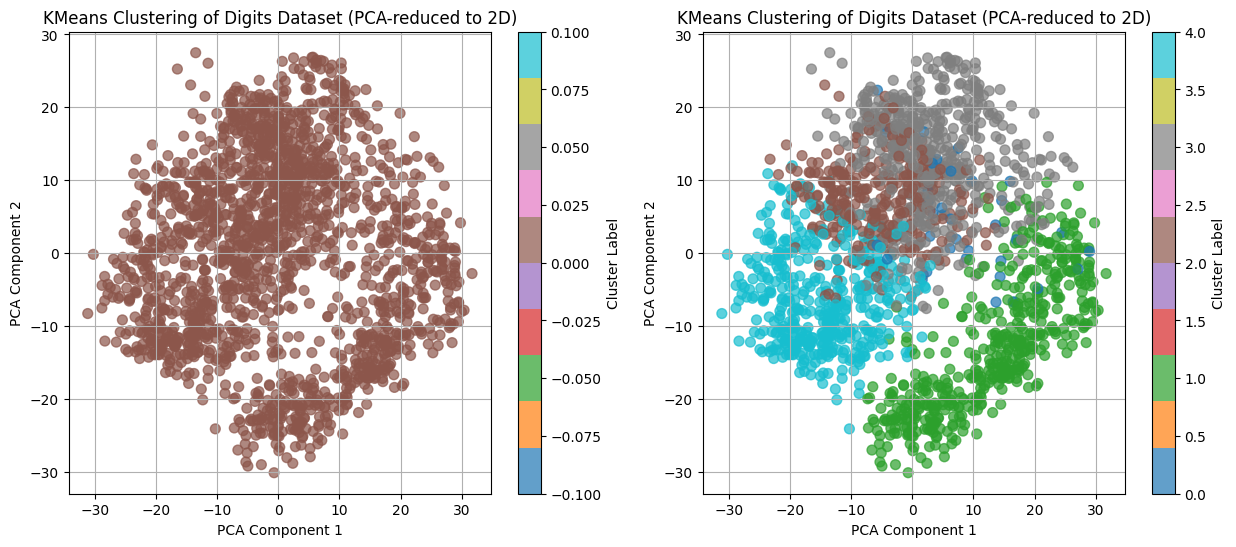

In [180]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.7)
plt.title("KMeans Clustering of Digits Dataset (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.subplot(1,2,2)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.7)
plt.title("KMeans Clustering of Digits Dataset (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

In [181]:
X2=pd.read_csv('Mall_Customers.csv')

In [182]:
X2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [183]:
X2['Genre']=X2['Genre'].map({'Male':1,'Female':0})
X2=X2.drop(columns=['CustomerID','Genre'])
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [184]:
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)

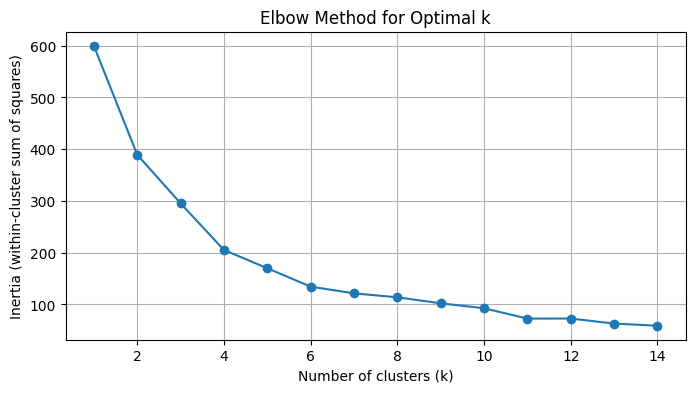

In [185]:
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show() 

In [186]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X2_pca)
centroids = kmeans.cluster_centers_

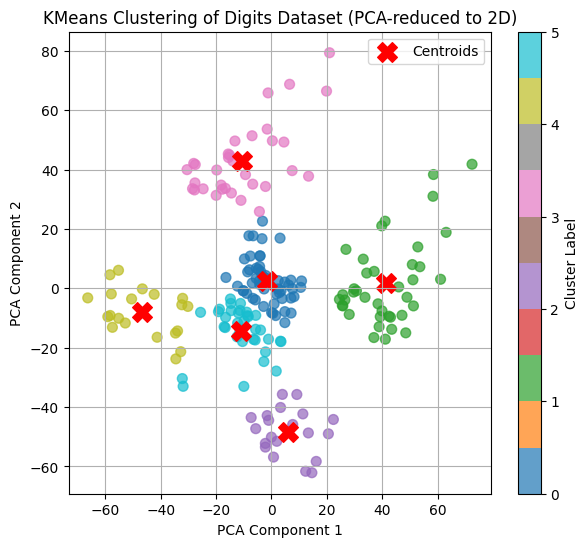

In [187]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
scatter = plt.scatter(X2_pca[:,0], X2_pca[:,1], c=clusters, cmap='tab10', s=50, alpha=0.7)
plt.scatter(centroids[:,0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("KMeans Clustering of Digits Dataset (PCA-reduced to 2D)")
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()